<a href="https://colab.research.google.com/github/ShraddhaYewale/Machine-Learning/blob/main/HandlingMissingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handling missing value inputing categorical data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("/content/Machine Learning/loan.csv")

In [5]:
dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [6]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
#dataset.fillna(method="bfill",axis=1)

In [23]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0])


,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
609,Female
610,Male
611,Male
612,Male


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
dataset.select_dtypes(include="object").isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


In [21]:
for i in dataset.select_dtypes(include="object").columns:
  dataset[i].fillna(dataset["Gender"].mode()[0])

In [26]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Filling the categorical data

In [28]:
dataset.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [29]:
from sklearn.impute import SimpleImputer

In [34]:
si=SimpleImputer(strategy="mean")
arr=si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [36]:
new_dataset=pd.DataFrame(arr,columns=dataset.select_dtypes(include="float64").columns)

In [37]:
new_dataset.isnull().sum()

,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


The mean is filled in loan amount Nan value

In [38]:
new_dataset

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [39]:
dataset["LoanAmount"].mean()

np.float64(146.41216216216216)

<Axes: >

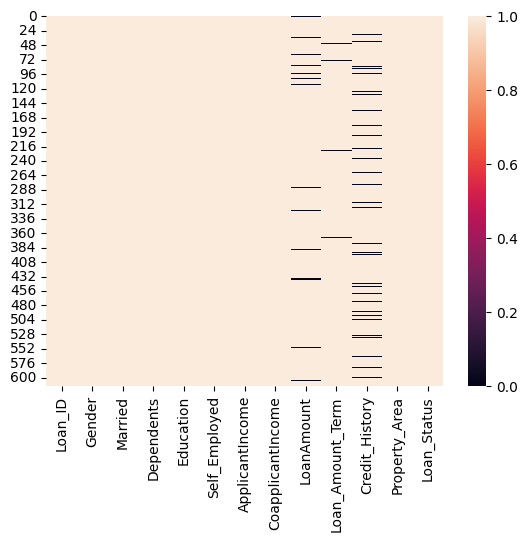

In [43]:
sns.heatmap(dataset.notnull())
